In [11]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [10]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/workspace/dataset/MyExamples/dogs-vs-cats-original/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size =20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150,150), batch_size=batch_size,class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1)* batch_size] = features_batch
        labels[i * batch_size : (i + 1)* batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    #print(features.shape)
    return features, labels

train_features, train_labels =extract_features(train_dir, 2000)
validation_features, validation_labels =extract_features(validation_dir, 1000)
test_features, test_labels =extract_features(test_dir, 1000)

#print(train_features.shape)
train_features = np.reshape(train_features, (2000, 4*4*512))
#print(valdiation_features.shape)
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(train_features, train_labels, epochs=30, batch_size=20,
                   validation_data=(validation_features, validation_labels))

Instructions for updating:
Use tf.cast instead.
Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 342us/step - loss: 0.5961 - acc: 0.6705 - val_loss: 0.4543 - val_acc: 0.8170
Epoch 2/30
2000/2000 [==============================] - 0s 150us/step - loss: 0.4365 - acc: 0.8075 - val_loss: 0.3756 - val_acc: 0.8550
Epoch 3/30
2000/2000 [==============================] - 0s 155us/step - loss: 0.3567 - acc: 0.8585 - val_loss: 0.3334 - val_acc: 0.8680
Epoch 4/30
2000/2000 [==============================] - 0s 169us/step - loss: 0.3205 - acc: 0.8730 - val_loss: 0.3056 - val_acc: 0.8790
Epoch 5/30
2000/2000 [==============================] - 0s 152us/step - loss: 0.2876 - acc: 0.8805 - val_loss: 0.2933 - val_acc: 0.8820
Epoch 6/30
2000/2000 [==============================] - 0s 172us/step - loss: 0.2642 - acc: 0.8975 - val_loss: 0.2765 - val_acc: 0.8940
Epoch 7/30
2000/2000 [==============================] - 0s 182us/step - loss: 0.2494 - a

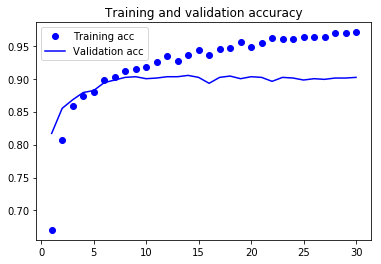

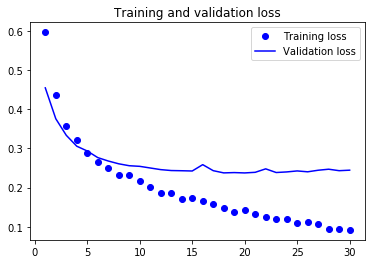

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()